In [ ]:

import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

pd.options.display.max_rows=10
pd.options.display.float_format="{:.1f}".format

In [ ]:
training_df=pd.read_csv(filepath_or_buffer="/content/california_housing_train.csv")

training_df["median_house_value"] /= 1000.0

training_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66.9
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80.1
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85.7
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73.4
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65.5


In [ ]:
training_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207.3
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,116.0
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,15.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119.4
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180.4
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500.0


In [ ]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer.
  model.add(tf.keras.layers.Dense(units=1,
                                  input_shape=(1,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error.
  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model


def train_model(model, df, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the model the feature and the label.
  # The model will train for the specified number of epochs.
  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0][0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch

  # Isolate the error for each epoch.
  hist = pd.DataFrame(history.history)

  # To track the progression of training, we're going to take a snapshot
  # of the model's root mean squared error at each epoch.
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined the build_model and train_model functions.")

Defined the build_model and train_model functions.


In [ ]:
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against 200 random training examples."""

  # Label the axes.
  plt.xlabel(feature)
  plt.ylabel(label)

  # Create a scatter plot from 200 random points of the dataset.
  random_examples = training_df.sample(n=200)
  plt.scatter(random_examples[feature], random_examples[label])

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = random_examples[feature].max()
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()


def plot_the_loss_curve(epochs, rmse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


Epoch 1/30
567/567 [==============================] - 1s 1ms/step - loss: 65135.3008 - root_mean_squared_error: 255.2162
Epoch 2/30
567/567 [==============================] - 1s 1ms/step - loss: 27807.5566 - root_mean_squared_error: 166.7560
Epoch 3/30
567/567 [==============================] - 1s 2ms/step - loss: 26905.9160 - root_mean_squared_error: 164.0302
Epoch 4/30
567/567 [==============================] - 1s 2ms/step - loss: 26519.0723 - root_mean_squared_error: 162.8468
Epoch 5/30
567/567 [==============================] - 1s 2ms/step - loss: 25545.1504 - root_mean_squared_error: 159.8285
Epoch 6/30
567/567 [==============================] - 1s 1ms/step - loss: 25186.7695 - root_mean_squared_error: 158.7034
Epoch 7/30
567/567 [==============================] - 1s 1ms/step - loss: 24189.6543 - root_mean_squared_error: 155.5302
Epoch 8/30
567/567 [==============================] - 1s 1ms/step - loss: 23482.5547 - root_mean_squared_error: 153.2402
Epoch 9/30
567/567 [============

<ipython-input-6-c3a44f6b57f6>:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("\n The learned weight %.4f"% weight)
<ipython-input-6-c3a44f6b57f6>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("\n The learned bisa %.4f"%bias)



 The learned weight 0.0227

 The learned bisa 132.2148


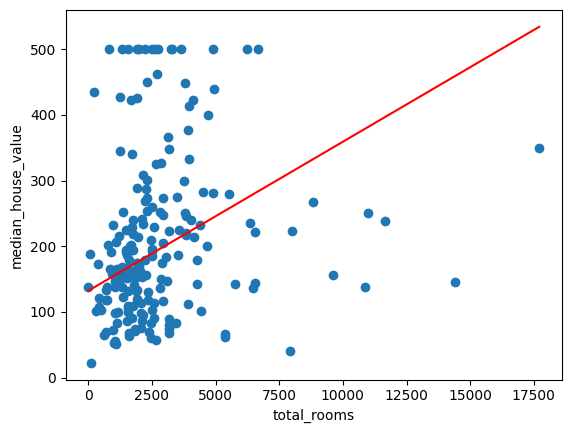

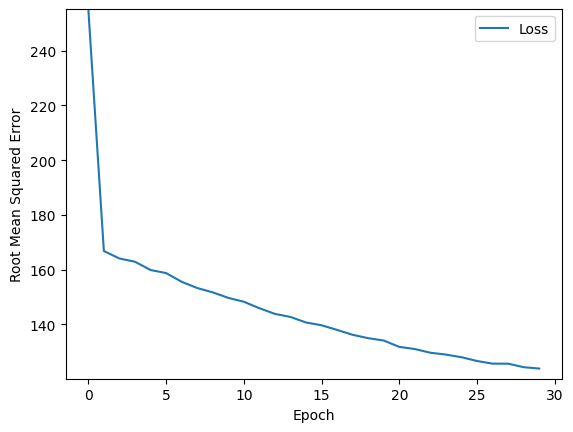

In [ ]:
learning_rate=0.01
epochs=30
batch_size=30

my_feature="total_rooms"
my_label="median_house_value"

my_model=None

my_model=build_model(learning_rate)
weight,bias,epochs,rmse=train_model(my_model,training_df,my_feature,my_label,epochs,batch_size)

print("\n The learned weight %.4f"% weight)
print("\n The learned bisa %.4f"%bias)

plot_the_model(weight,bias,my_feature,my_label)
plot_the_loss_curve(epochs,rmse)


In [ ]:
def predict_house_values(n,feature,label):
    batch=training_df[feature][10000:10000 + n]
    predicted_values=my_model.predict_on_batch(x=batch)
    print("feature   label          predicted")
    print("  value   value          value")
    print("          in thousand$   in thousand$")
    for i in range(n):
        print("%5.0f %6.0f %15.0f"%(training_df[feature][10000+i],
                                    training_df[label][10000+i],
                                    predicted_values[i][0]))


In [ ]:
predict_house_values(10,my_feature,my_label)

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
 1960     53             177
 3400     92             209
 3677     69             216
 2202     62             182
 2403     80             187
 5652    295             260
 3318    500             208
 2552    342             190
 1364    118             163
 3468    128             211


Epoch 1/18
5667/5667 [==============================] - 8s 1ms/step - loss: 31625.8066 - root_mean_squared_error: 177.8365
Epoch 2/18
5667/5667 [==============================] - 8s 1ms/step - loss: 20026.0898 - root_mean_squared_error: 141.5136
Epoch 3/18
5667/5667 [==============================] - 8s 1ms/step - loss: 18334.9121 - root_mean_squared_error: 135.4065
Epoch 4/18
5667/5667 [==============================] - 7s 1ms/step - loss: 18041.8906 - root_mean_squared_error: 134.3201
Epoch 5/18
5667/5667 [==============================] - 8s 1ms/step - loss: 18090.4512 - root_mean_squared_error: 134.5007
Epoch 6/18
5667/5667 [==============================] - 8s 1ms/step - loss: 17860.5039 - root_mean_squared_error: 133.6432
Epoch 7/18
5667/5667 [==============================] - 7s 1ms/step - loss: 17783.1289 - root_mean_squared_error: 133.3534
Epoch 8/18
5667/5667 [==============================] - 8s 1ms/step - loss: 17892.3711 - root_mean_squared_error: 133.7624
Epoch 9/18
5667/

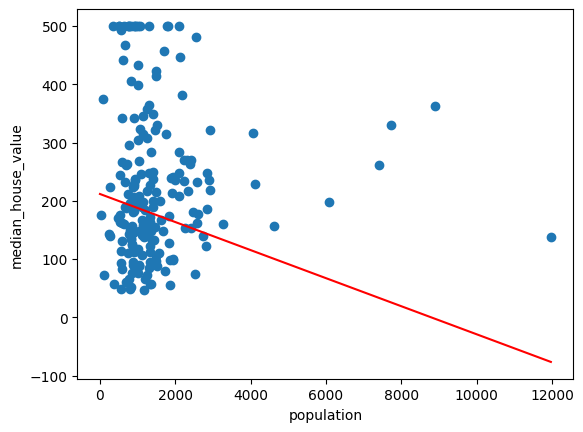

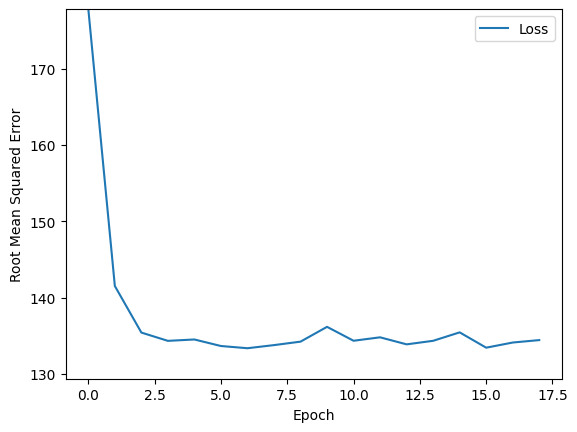

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
 1286     53             181
 1867     92             167
 2191     69             159
 1052     62             186
 1647     80             172
 2312    295             156
 1604    500             173
 1066    342             186
  338    118             204
 1604    128             173


In [ ]:
my_feature="population"

learning_rate=0.05
epochs=18
batch_size=3

my_model=build_model(learning_rate)
weight,bias,epochs,rmse=train_model(my_model,training_df,my_feature,my_label,epochs,batch_size)
plot_the_model(weight,bias,my_feature,my_label)
plot_the_loss_curve(epochs,rmse)
predict_house_values(10,my_feature,my_label)

Epoch 1/24
567/567 [==============================] - 1s 1ms/step - loss: 87274.9141 - root_mean_squared_error: 295.4233
Epoch 2/24
567/567 [==============================] - 1s 1ms/step - loss: 30485.7656 - root_mean_squared_error: 174.6017
Epoch 3/24
567/567 [==============================] - 1s 2ms/step - loss: 26485.8613 - root_mean_squared_error: 162.7448
Epoch 4/24
567/567 [==============================] - 1s 2ms/step - loss: 23860.8477 - root_mean_squared_error: 154.4696
Epoch 5/24
567/567 [==============================] - 1s 2ms/step - loss: 21612.3281 - root_mean_squared_error: 147.0113
Epoch 6/24
567/567 [==============================] - 1s 1ms/step - loss: 20007.5801 - root_mean_squared_error: 141.4482
Epoch 7/24
567/567 [==============================] - 1s 1ms/step - loss: 19066.1973 - root_mean_squared_error: 138.0804
Epoch 8/24
567/567 [==============================] - 1s 1ms/step - loss: 18831.5215 - root_mean_squared_error: 137.2280
Epoch 9/24
567/567 [============

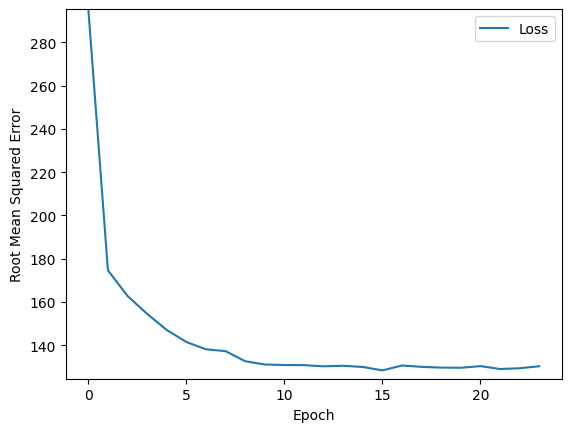

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
 1286     53             146
 1867     92             118
 2191     69             102
 1052     62             158
 1647     80             128
 2312    295              96
 1604    500             131
 1066    342             157
  338    118             193
 1604    128             131
 1200    187             150
  292     80             195
 2014    112             110
 1817     95             120
 1328     69             144


In [ ]:
training_df["room_per_person"]=training_df["total_rooms"] / training_df["population"]

learning_rate=0.06
epochs=24
batch_size=30

my_model=build_model(learning_rate)
weight,bias,epochs,rmse=train_model(my_model,training_df,my_feature,my_label,epochs,batch_size)

plot_the_loss_curve(epochs,rmse)
predict_house_values(15,my_feature,my_label)

Find feature(s) whose raw values correlate with the label
So far, we've relied on trial-and-error to identify possible features for the model. Let's rely on statistics instead.

A correlation matrix indicates how each attribute's raw values relate to the other attributes' raw values. Correlation values have the following meanings:

1.0: perfect positive correlation; that is, when one attribute rises, the other attribute rises.
-1.0: perfect negative correlation; that is, when one attribute rises, the other attribute falls.
0.0: no correlation; the two columns are not linearly related.
In general, the higher the absolute value of a correlation value, the greater its predictive power. For example, a correlation value of -0.8 implies far more predictive power than a correlation of -0.2.

The following code cell generates the correlation matrix for attributes of the California Housing Dataset:

In [ ]:
training_df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,room_per_person
longitude,1.0,-0.9,-0.1,0.0,0.1,0.1,0.1,-0.0,-0.0,-0.1
latitude,-0.9,1.0,0.0,-0.0,-0.1,-0.1,-0.1,-0.1,-0.1,0.1
housing_median_age,-0.1,0.0,1.0,-0.4,-0.3,-0.3,-0.3,-0.1,0.1,-0.1
total_rooms,0.0,-0.0,-0.4,1.0,0.9,0.9,0.9,0.2,0.1,0.1
total_bedrooms,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,-0.0,0.0,0.0
population,0.1,-0.1,-0.3,0.9,0.9,1.0,0.9,-0.0,-0.0,-0.1
households,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,0.0,0.1,-0.0
median_income,-0.0,-0.1,-0.1,0.2,-0.0,-0.0,0.0,1.0,0.7,0.2
median_house_value,-0.0,-0.1,0.1,0.1,0.0,-0.0,0.1,0.7,1.0,0.2
room_per_person,-0.1,0.1,-0.1,0.1,0.0,-0.1,-0.0,0.2,0.2,1.0


Epoch 1/24
1700/1700 [==============================] - 2s 1ms/step - loss: 51087.4219 - root_mean_squared_error: 226.0253
Epoch 2/24
1700/1700 [==============================] - 2s 1ms/step - loss: 24293.8438 - root_mean_squared_error: 155.8648
Epoch 3/24
1700/1700 [==============================] - 2s 1ms/step - loss: 20768.0176 - root_mean_squared_error: 144.1111
Epoch 4/24
1700/1700 [==============================] - 3s 1ms/step - loss: 18447.6152 - root_mean_squared_error: 135.8220
Epoch 5/24
1700/1700 [==============================] - 2s 1ms/step - loss: 18043.0586 - root_mean_squared_error: 134.3244
Epoch 6/24
1700/1700 [==============================] - 2s 1ms/step - loss: 17784.7559 - root_mean_squared_error: 133.3595
Epoch 7/24
1700/1700 [==============================] - 2s 1ms/step - loss: 17769.1562 - root_mean_squared_error: 133.3010
Epoch 8/24
1700/1700 [==============================] - 2s 1ms/step - loss: 17501.9414 - root_mean_squared_error: 132.2949
Epoch 9/24
1700/

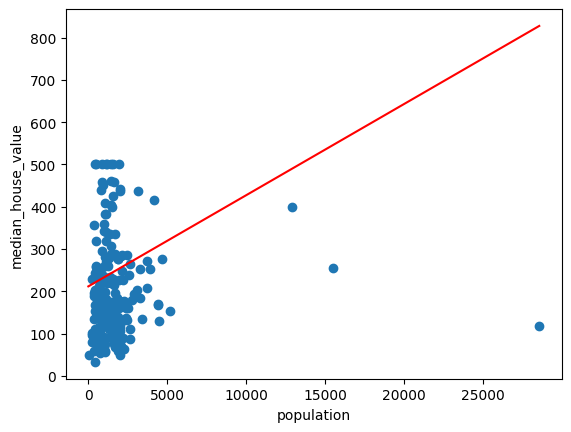

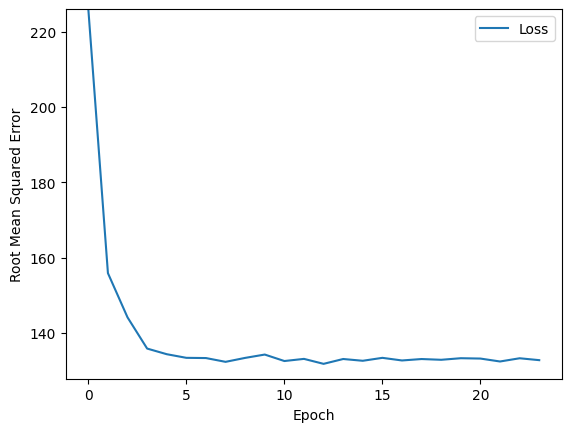

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
 1286     53             239
 1867     92             252
 2191     69             259
 1052     62             234
 1647     80             247
 2312    295             261
 1604    500             246
 1066    342             235
  338    118             219
 1604    128             246


In [ ]:
learning_rate=0.06
epochs=24
batch_size=10

my_model=build_model(learning_rate)
weight,bias,epochs,rmse=train_model(my_model,training_df,my_feature,my_label,epochs,batch_size)

plot_the_model(weight,bias,my_feature,my_label)
plot_the_loss_curve(epochs,rmse)
predict_house_values(10,my_feature,my_label)